# Networks: structure, evolution & processes
**Internet Analytics - Lab 2**

---

**Group:** *S*

**Names:**

* *Adam Cohen*
* *Stefan Peters*
* *Alexandre Spiess*
* *Tom Oliver Martin Vrakking*

---

#### Instructions

*This is a template for part 1 of the lab. Clearly write your answers, comments and interpretations in Markodown cells. Don't forget that you can add $\LaTeX$ equations in these cells. Feel free to add or remove any cell.*

*Please properly comment your code. Code readability will be considered for grading. To avoid long cells of codes in the notebook, you can also embed long python functions and classes in a separate module. Don’t forget to hand in your module if that is the case. In multiple exercises, you are required to come up with your own method to solve various problems. Be creative and clearly motivate and explain your methods. Creativity and clarity will be considered for grading.*

---

## 2.1 Exploration of real networks

#### Exercise 2.1

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

def load_network(file_path):
    """Load a network from a CSV file."""
    G = nx.Graph()
    with open(file_path, 'r') as f:
        for line in f:
            if line.startswith('#'):
                continue
            u, v = line.strip().split(',')
            G.add_edge(u, v)
    return G

def show_basic_stats(G, network_name=''):
    """Display basic statistics of a network."""
    print(f"{network_name} - Nodes: {G.number_of_nodes()}, Edges: {G.number_of_edges()}")

#### Exercise 2.2:  Node degree distribution

1. In this task, a log-log histogram is the most informative for visualising the node degree distribution. 
2. We see that most node have relatively few connections, while a small percentage have a very high degree. 
3. In the plot, the data appears roughly linear, which suggests that it follows a power-law distribution. From the graph, the slope is approximately $-\frac{4}{3}$.
Hence, we can approximate the power-law exponent as $\gamma = \frac{4}{3}$.

In [9]:
def show_degree_distribution(G, num_bins=20, network_name=''):
    """Plot the log-log histogram of the degree distribution of a network."""
    degrees = [d for _, d in G.degree() if d > 0]
    if not degrees:
        print("No nonzero degrees found")
        return

    bins = np.logspace(np.log10(min(degrees)), np.log10(max(degrees)), num_bins)

    plt.figure()
    plt.hist(degrees, bins=bins, edgecolor='black')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel("Degree (log scale)")
    plt.ylabel("Frequency (log scale)")
    plt.title(f"{network_name} Degree Distribution (log-log scale)")
    plt.show()


#### Exercise 2.3: Giant component

In [10]:
def get_giant_component(G, verbose=True, network_name=''):
    """Extract the giant component of a network."""
    components = list(nx.connected_components(G))
    giant = max(components, key=len)

    if verbose:
        print(f"{network_name} - Number of components: {len(components)}")
        print(f"{network_name} - Size of giant component: {len(giant)}")

    return G.subgraph(giant).copy()

#### Exercise 2.4: Short paths & Small-worlds

Network 1 - Nodes: 13033, Edges: 18584


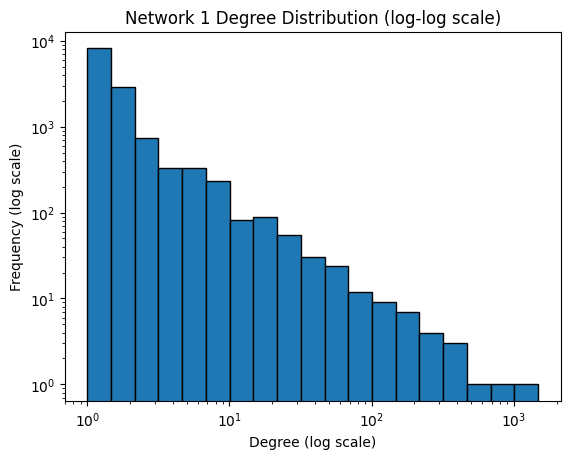

Network 1 - Number of components: 192
Network 1 - Size of giant component: 12576


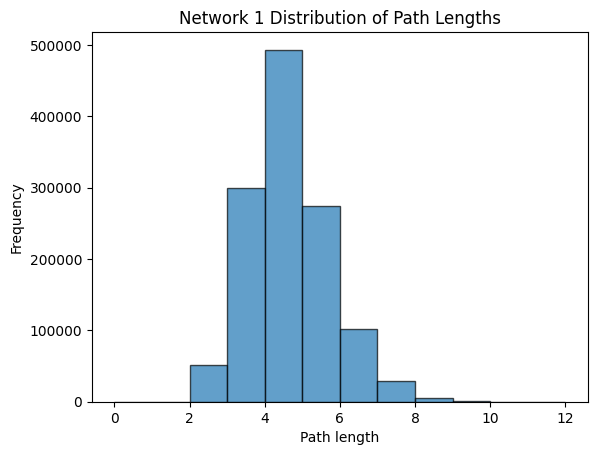

Network 1 Approx. average shortest path length: 4.15


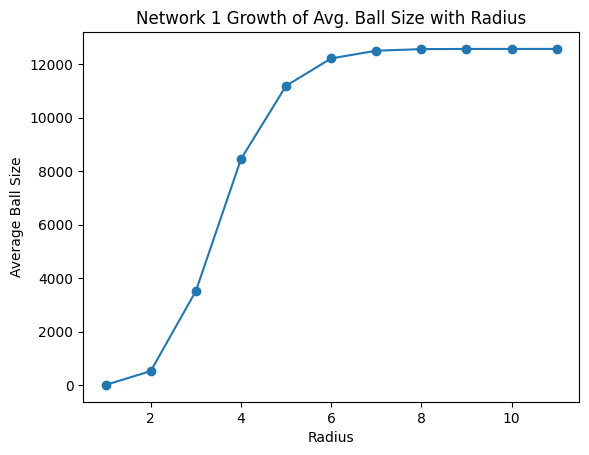

In [11]:
def analyze_shortest_paths(G, sample_size=100, network_name=''):
    """Analyze shortest path lengths and ball size growth for the giant component."""
    sample_size = min(sample_size, G.number_of_nodes())
    nodes_sample = random.sample(list(G.nodes()), sample_size)

    bfs_results = {u: nx.single_source_shortest_path_length(G, u) for u in nodes_sample}

    all_path_lengths = [length for lengths in bfs_results.values() for length in lengths.values()]

    plt.figure()
    plt.hist(all_path_lengths, bins=range(max(all_path_lengths) + 2), edgecolor='black', alpha=0.7)
    plt.xlabel("Path length")
    plt.ylabel("Frequency")
    plt.title(f"{network_name} Distribution of Path Lengths")
    plt.show()

    avg_shortest_paths = [np.mean(list(lengths.values())) for lengths in bfs_results.values()]
    approx_avg_shortest_path = np.mean(avg_shortest_paths)
    print(f"{network_name} Approx. average shortest path length: {approx_avg_shortest_path:.2f}")

    max_radius = max(max(lengths.values()) for lengths in bfs_results.values())
    avg_ball_sizes = [
        np.mean([sum(1 for d in bfs_results[u].values() if d <= r) for u in nodes_sample])
        for r in range(1, max_radius + 1)
    ]

    plt.figure()
    plt.plot(range(1, max_radius + 1), avg_ball_sizes, marker='o')
    plt.xlabel("Radius")
    plt.ylabel("Average Ball Size")
    plt.title(f"{network_name} Growth of Avg. Ball Size with Radius")
    plt.show()

G1 = load_network('../../ix-lab2-files-2025/data/network1.csv')
show_basic_stats(G1, 'Network 1')
show_degree_distribution(G1, network_name='Network 1')
G1_giant = get_giant_component(G1, network_name='Network 1')
analyze_shortest_paths(G1_giant, network_name='Network 1')

#### Exercise 2.5: Network comparison

- **Size & Connectivity:**  
  - **Network1:** 13,033 nodes, 18,584 edges, 192 components (giant component: 12,576 nodes).  
  - **Network2:** 26,542 nodes, 43,516 edges, 5 components (giant component: 26,481 nodes).

- **Degree Distribution:**  
  - **Network1:** Exhibits a rough power-law with a few high-degree hubs.  
  - **Network2:** Shows a more uniform distribution with fewer extreme hubs.

- **Path Lengths:**  
  - **Network1:** Average shortest path is approximately 4.2.
  - **Network2:** Average shortest path is around 98.8.

Network 2 - Nodes: 26542, Edges: 43516


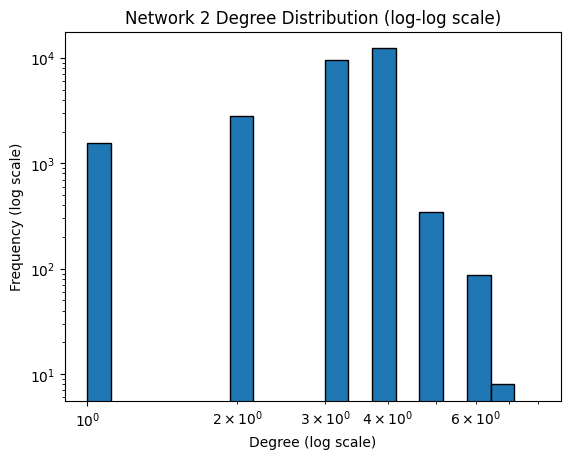

Network 2 - Number of components: 5
Network 2 - Size of giant component: 26481


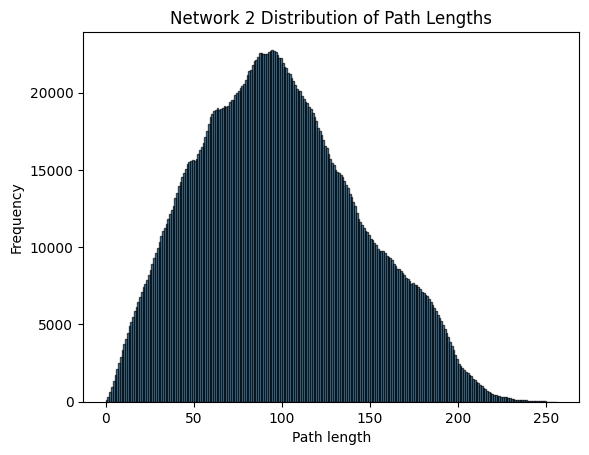

Network 2 Approx. average shortest path length: 98.10


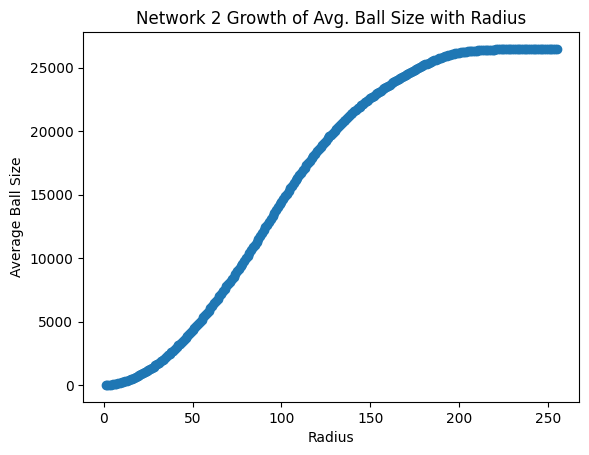

In [12]:
G2 = load_network('../../ix-lab2-files-2025/data/network2.csv')
show_basic_stats(G2, 'Network 2')
show_degree_distribution(G2, network_name='Network 2')
G2_giant = get_giant_component(G2, network_name='Network 2')
analyze_shortest_paths(G2_giant, network_name='Network 2')

#### Exercise 2.6: Network identification

- **Network 1** is most likely the subgraph of the Internet (routers and physical links). The sampled average path length is only about 4.2, which is characteristic of “small-world” networks like the Internet. The power-law–like distribution with some very high-degree nodes also aligns well with typical router-level topologies.
- **Network 2** is most likely the road network around NYC (intersections and roads). A sampled average path length near 100 is far larger than typical Internet topologies, but plausible for a physical road network spread over a large urban area. Road networks tend to be more grid-like, resulting in much longer shortest-path distances, compared to the highly interconnected Internet.